In [1]:
import numpy as np
import matplotlib.pyplot as plt

from lib import pyaxionflux as afl

# You can type 'help(afl)' to inspect the contents of the module
afl.module_info()

This is the SolarAxionFlux v0.9 Python interface. The source code was installed in /Users/sebhoof/Software/solar_axion_flux.


In [2]:
# Import the B16-AGSS09 solar model (arXiv:1611.09867); this should take about 30 secs.
solar_model_file = "data/solar_models/SolarModel_B16-AGSS09.dat"
sol = afl.SolarModel(solar_model_file)

WARNING. Radii do not agree with min/max radius values available in Solar model! Unsupported radii will be ignored.


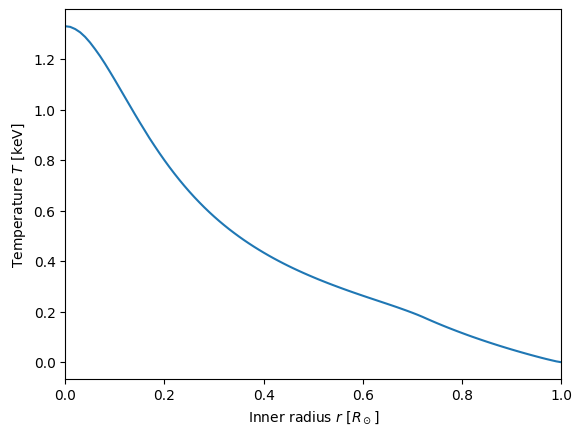

In [3]:
rvals = np.linspace(0, 1, 101) # in Rsol

# Plot the temperature inside the Sun
# You can use 'help(sol)' to see other available functions
plt.plot(rvals, sol.temperature(rvals))
plt.xlabel(r"Inner radius $r$ [$R_\odot$]")
plt.ylabel(r"Temperature $T$ [keV]")
plt.xlim([0, 1])
plt.show()

INFO. Performing calculation for 201 energies in [0.3, 10.3] keV and up to rmax = 0.999999 R_sol.
WARNING! File results/example_P.dat exists and will be overwritten.


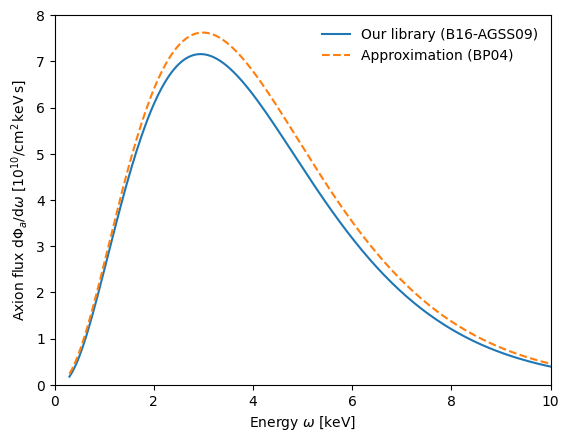

In [5]:
# Compute the Primakoff spectrum for the full Sun and compare to the literature
# Also save the results as 'results/example_P.dat'

evals = np.linspace(0.3, 10.3, 201) # in keV
rmax = 1.0 # in Rsol
output_file_root = "results/example"

_, p_spectrum = afl.calculate_spectra(evals, rmax, sol, output_file_root, process="Primakoff")

# Commonly used approx. from arXiv:hep-ex/0702006, based on the BP04 model (arXiv:astro-ph/0402114)
p_spectrum_approx = lambda om: 6.02*om**2.481*np.exp(-om/1.205)

# Plot the results (all assuming m ~ 0, gagamma = 1e-10/GeV)
plt.plot(evals, np.array(p_spectrum)/1e10, label=r"Our library (B16-AGSS09)")
plt.plot(evals, p_spectrum_approx(evals), '--', label=r"Approximation (BP04)")
plt.xlabel(r"Energy $\omega$ [keV]")
plt.ylabel(r"Axion flux $\mathrm{d}\Phi_a/\mathrm{d}\omega$ [$10^{10}/\mathrm{cm}^2\,\mathrm{keV}\,\mathrm{s}$]")
plt.legend(frameon=False)
plt.xlim([0, 10])
plt.ylim([0, 8])
plt.show()